# Notebook for Linear Algebra Review

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Vectors 

a *vector* is an array of real numbers.

In [2]:
x = np.array([1, 2, 3, 4])
display(x)
display(x.shape)

array([1, 2, 3, 4])

(4,)

In [3]:
x2 = x.reshape(-1, 1)
display(x2)
display(x2.shape)

array([[1],
       [2],
       [3],
       [4]])

(4, 1)

In [4]:
display(x2.T)
display(x2.T.shape)

array([[1, 2, 3, 4]])

(1, 4)

/Users/david/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


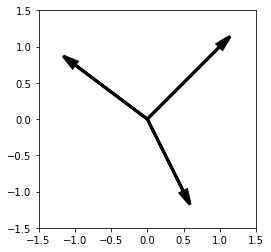

In [5]:
fig, ax = plt.subplots()

def plot_arrow_from_origin(ax, x, color="black"):
    xlim = ax.get_xlim()
    new_xlim = [0, 0]
    new_xlim[0] = np.min([xlim[0], x[0] - 0.5])
    new_xlim[1] = np.max([xlim[1], x[0] + 0.5])
    ax.set_xlim(new_xlim)
    ylim = ax.get_ylim()
    new_ylim = [0, 0]
    new_ylim[0] = np.min([ylim[0], x[1] - 0.5])
    new_ylim[1] = np.max([ylim[1], x[1] + 0.5])
    ax.set_ylim(new_ylim)
    ax.set(adjustable='box-forced', aspect='equal')
    ax.arrow(0, 0, x[0], x[1],
             head_width=0.1, linewidth=3, head_length=0.2,
             fc=color, ec=color)
    
plot_arrow_from_origin(ax, (1, 1))
plot_arrow_from_origin(ax, (0.5, -1))
plot_arrow_from_origin(ax, (-1, 0.75))

### Adding and multipling a vector

*adding*: a constant is added to each element in the vector

*multiplication*: a constant is multipled by each elemnt in the vector

In [6]:
# addition
a = 4
print('Addition')
display(x)
display(x + 4)

# multiplication
print('\n')
print('Multiplication')
display(x)
display(x * 4)

Addition


array([1, 2, 3, 4])

array([5, 6, 7, 8])



Multiplication


array([1, 2, 3, 4])

array([ 4,  8, 12, 16])

The **norm** or **length of a vector** $\mathbf{x}$ is defined by using the pythagorean theorem

$$||\boldsymbol{x}|| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$$

And a **unit vector** is one for which

$$||\boldsymbol{x}|| = 1 $$


The **norm** is the positive length of a vector (calculated from the origin) 

In [7]:
print(x)
print(x**2)
print(np.sqrt(np.sum(x**2)))
print(np.linalg.norm(x))

[1 2 3 4]
[ 1  4  9 16]
5.477225575051661
5.477225575051661


In [8]:
x3 = np.array([1, 1])
print(x3.shape)
print(x3)
print(np.linalg.norm(x3))

(2,)
[1 1]
1.4142135623730951


In [9]:
# a**2 + b**2 = c**2
c2 = 1**2 + 1**2
c = np.sqrt(c2)
c

1.4142135623730951

### Dot Products and Angles Between Vectors

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then the _dot product_ is given by

$$\boldsymbol{x} \cdot \boldsymbol{y} = x_1y_1 + x_2y_2 + \cdots + x_ny_n$$

In [10]:
y = np.array([4, 3, 2, 1])
print(x)
print(y)
np.dot(x, y)

[1 2 3 4]
[4 3 2 1]


20

In [11]:
print(x.shape)
print(y.shape)
(4*1) + (2*3) + (3*2) + (4*1)

(4,)
(4,)


20

The **cosine of the angle between the two vectors** can be computed by the following formula:

$$cos(\theta) = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{||\boldsymbol{x}|| \text{ } ||\boldsymbol{y}||}$$

In [12]:
y = np.array([5, 6, 7, 8])
np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

0.9688639316269662

In [13]:
print(np.dot(x, y))
print(np.linalg.norm(x))
print(np.linalg.norm(y))

70
5.477225575051661
13.19090595827292


/Users/david/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


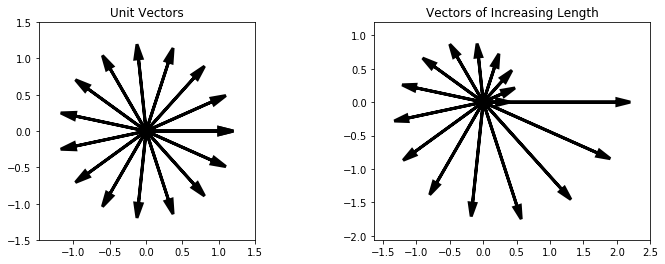

In [14]:
def unit_vector_from_angle(angle):
    return np.array([np.cos(angle), np.sin(angle)])

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

angles = np.linspace(0, 2*np.pi, num=16)
for angle in angles:
    plot_arrow_from_origin(axs[0], unit_vector_from_angle(angle))
axs[0].set_title("Unit Vectors")
    
scales = np.linspace(0.2, 2, num=16)
for angle, scale in zip(angles, scales):
    plot_arrow_from_origin(axs[1], scale*unit_vector_from_angle(angle))
axs[1].set_title("Vectors of Increasing Length");

/Users/david/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


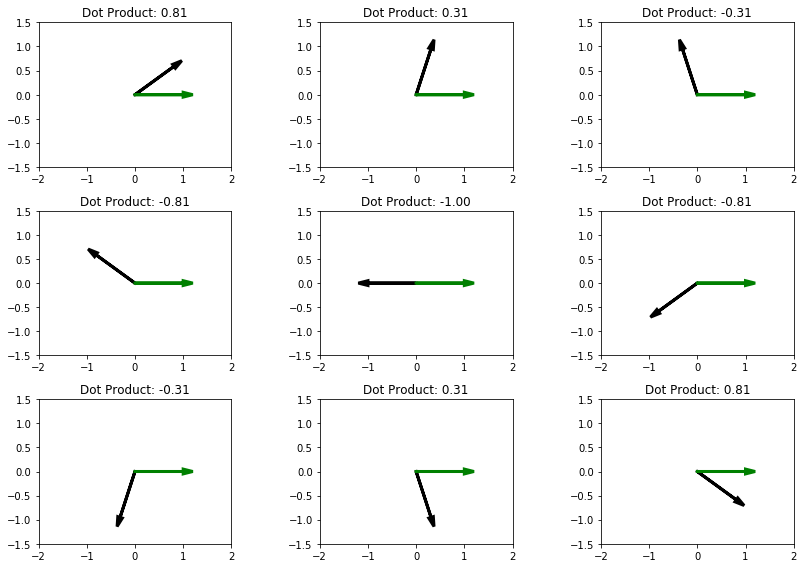

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

angles = np.linspace(0, 2*np.pi, num=11)
for ax, angle in zip(axs.flatten(), angles[1:-1]):
    v = unit_vector_from_angle(angle)
    plot_arrow_from_origin(ax, v)
    ax.set_xlim((-2, 2)); ax.set_ylim(-1.5, 1.5)
    plot_arrow_from_origin(ax, (1, 0), color="green")
    
    dot_prod = np.dot((1, 0), v)
    ax.set_title("Dot Product: {:2.2f}".format(dot_prod))
    
plt.tight_layout()

If $\boldsymbol{x} \cdot \boldsymbol{y} = 0$ then $\boldsymbol{x}$ and $\boldsymbol{y}$ are *orthogonal* (aligns with the intuitive notion of perpendicular)

In [16]:
w = np.array([1, 2])
v = np.array([-2, 1])
np.dot(w, v)

0

/Users/david/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


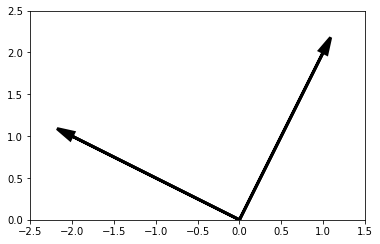

In [17]:
fig, ax = plt.subplots()

plot_arrow_from_origin(ax, (1, 2))
plot_arrow_from_origin(ax, (-2, 1))

The square of the norm of a vector is just the vector dot product with itself
$$
||\boldsymbol{x}||^2 = \boldsymbol{x} \cdot \boldsymbol{x}
$$

In [18]:
print(np.linalg.norm(x)**2)
print(np.dot(x, x))

30.0
30


The **distance between two vectors** is the norm of the difference.

$$
d(\boldsymbol{x},\boldsymbol{y}) = ||\boldsymbol{x}-\boldsymbol{y}||
$$

In [19]:
print(x)
print(y)

[1 2 3 4]
[5 6 7 8]


In [20]:
np.linalg.norm(x - y)

8.0

In [21]:
print(x - y)
np.linalg.norm(x - y)

[-4 -4 -4 -4]


8.0

The arrays need to be the same shape? (**FIGURE THIS OUT**)

In [22]:
x2 = np.array([10, 20, 3]).reshape(-1, 1)
y2 = np.array([1, 2, 3, 4]).reshape(-1, 1)

In [23]:
np.linalg.norm(x2 - y2)

ValueError: operands could not be broadcast together with shapes (3,1) (4,1) 

### Linear Combination of Vectors

If we have two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ of the same length $(n)$, then

$$\boldsymbol{x} + \boldsymbol{y} = [x_1+y_1, x_2+y_2, \ldots, x_n+y_n]$$

In [24]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
print(x + y)

[ 6  8 10 12]


Geometrically, this adds vectors with the **parallelogram rule**:

![](parallelogram.gif)

A **linear combination** of a collection of vectors $(\boldsymbol{x}_1,
                                                    \boldsymbol{x}_2, \ldots,
                                                    \boldsymbol{x}_m)$ 
is a vector of the form

$$a_1 \cdot \boldsymbol{x}_1 + a_2 \cdot \boldsymbol{x}_2 + 
\cdots + a_m \cdot \boldsymbol{x}_m$$

That is, **a linear combination is formed out of a collection of vectors by multiplying them by various constants, and then adding the results.**

In [27]:
a1=2
x1 = np.array([1, 2, 3, 4])
print(f'x1: {x1}')
print("a1*x1 = {}".format(a1*x1))
a2=4
x2 = np.array([5, 6, 7, 8])
print(f'x2: {x2}')
print("a2*x2 = {}".format(a2*x2))
print("a1*x1 + a2*x2 = {}".format(a1*x1 + a2*x2))

x1: [1 2 3 4]
a1*x1 = [2 4 6 8]
x2: [5 6 7 8]
a2*x2 = [20 24 28 32]
a1*x1 + a2*x2 = [22 28 34 40]


In [30]:
display(a1 * x1)
display(a2 * x2)
display(a1 * x1 + a2 * x2)

array([2, 4, 6, 8])

array([20, 24, 28, 32])

array([22, 28, 34, 40])

Geometrically, all the linear combinations of a collection of vectors trace out the **plane spanned by those vectors.**

![](vectors.png)

# Matrices

An **$n \times p$ matrix** is an array of numbers with $n$ rows and $p$ columns:

$$
X =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p} \\
    x_{21} & x_{22} & \cdots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{np} 
  \end{bmatrix}
$$

Often in data science, matricies are used as a low level representation of a data set.  In this context:

- $n$ = number of rows = the number of observations  
- $p$ = number of columns = the number of features

In [31]:
L = [[1, 2, 3], [4, 5, 6]]
X = np.array(L)
print(X)

[[1 2 3]
 [4 5 6]]


The shape tells us the number of rows and columns.

In [32]:
X.shape

(2, 3)

### Basic Arithmetic


Let $X$ and $Y$ be matrices **of shape $n \times p$** (i.e. of **the same shape**).

We often use $x_{ij}$ $y_{ij}$ for $i=1, 2, \ldots, n$ and $j=1, 2, \ldots, p$ denote the entries of the matrix.

1. $X+Y$ is the matrix whose $(i,j)^{th}$ entry is $x_{ij} + y_{ij}$.  That is, the **matrix created by adding entry-by-entry**.
2. $X-Y$ is the matrix whose $(i,j)^{th}$ entry is $x_{ij} - y_{ij}$ That is, the **matrix created by subtracting entry-by-entry**.
3. $aX$, where $a$ is any real number, is the matrix whose $(i,j)^{th}$ entry is $ax_{ij}$. That is, the **matrix created by multiplying every entry by $a$**.

In [33]:
# addition
X = np.array([[1, 2, 3], [4, 5, 6]])
print("X = \n{}".format(X))
print()

Y = np.array([[7, 8, 9], [10, 11, 12]])
print("Y = \n{}".format(Y))
print()

print("X + Y = \n{}".format(X + Y))

X = 
[[1 2 3]
 [4 5 6]]

Y = 
[[ 7  8  9]
 [10 11 12]]

X + Y = 
[[ 8 10 12]
 [14 16 18]]


In [34]:
# subtraction
X = np.array([[1, 2, 3], [4, 5, 6]])
print("X = \n{}".format(X))
print()

Y = np.array([[7, 8, 9], [10, 11, 12]])
print("Y = \n{}".format(Y))
print()

print("X - Y = \n{}".format(X - Y))

X = 
[[1 2 3]
 [4 5 6]]

Y = 
[[ 7  8  9]
 [10 11 12]]

X - Y = 
[[-6 -6 -6]
 [-6 -6 -6]]


### Multiplication

In [38]:
print(X.shape)
print(Y.shape)
X*Y

(2, 3)
(2, 3)


array([[ 7, 16, 27],
       [40, 55, 72]])

In [41]:
display(X)
display(Y)

array([[1, 2, 3],
       [4, 5, 6]])

array([[ 7,  8,  9],
       [10, 11, 12]])

In [58]:
def multiply_matrices(x, y):
    if x.shape == y.shape:
        new_matrix = np.zeros(shape=(x.shape))
        for i in range(len(X)):
            for j in range(len(x[0])):
                new_matrix[i][j] = x[i][j] * y[i][j]
    return new_matrix
           

In [59]:
multiply_matrices(X, Y)

array([[ 7., 16., 27.],
       [40., 55., 72.]])

### Dot Products

(n * k) * (k * j) -> shape of n * j

In [62]:
# cant multiply X and Y because shape is not correct
np.dot(X, Y)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [63]:
print(X.shape)
print(Y.shape)

(2, 3)
(2, 3)


In [68]:
# 2 x 3 * 3 x 2 --> 2 x 2
display(np.dot(X, Y.T))

# 3 x 2 * 2 x 3 --> 3 x 3
display(np.dot(X.T, Y))

array([[ 50,  68],
       [122, 167]])

array([[47, 52, 57],
       [64, 71, 78],
       [81, 90, 99]])

In [104]:
def matrix_dot_product(x, y):
    if x.shape[1] == y.shape[0]:
        new_matrix = np.zeros(shape=(x.shape[0], y.shape[1]))
    else:
        return 'Dimensions do not match'
    
    for i in range(x.shape[0]):
        for k in range(y.shape[1]):
            sum_ = 0
            for j in range(x.shape[1]): # this is the same length in both X and Y
                sum_ += x[i][j] * y[j][k]
            new_matrix[i][k] = sum_
    return new_matrix
    
                

In [107]:
result = matrix_dot_product(X.T, Y)
print(result)

[[47. 52. 57.]
 [64. 71. 78.]
 [81. 90. 99.]]


In [115]:
result_sq = result**2
result_sq

array([[2209., 2704., 3249.],
       [4096., 5041., 6084.],
       [6561., 8100., 9801.]])

In [117]:
inv_result_sq = np.linalg.inv(result_sq)
inv_result_sq

array([[ 21.68055556, -31.72222222,  12.50462963],
       [-39.05555556,  57.22222222, -22.57407407],
       [ 17.76388889, -26.05555556,  10.28549383]])

In [120]:
# makes identity matrix
np.round(np.dot(result_sq, inv_result_sq), 2)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0., -0.,  1.]])

# System of Linear Equations

Matrices were invented in the context of **systems of linear equations**.

A system of linear equations is a collection of equations like:

\begin{align*}
    a_{11}x_1 + \cdots + a_{1n}x_n &= b_1 \\
    a_{21}x_1 + \cdots + a_{2n}x_n &= b_2 \\
    \vdots \hspace{1in} \vdots \\
    a_{m1}x_1 + \cdots + a_{mn}x_n &= b_m 
\end{align*}

So for example:

\begin{align*}
    2 x_1 - x_2 = 4 \\
    x_1 + 6 x_2 = 0
\end{align*}

We can represent the system above as a matrix and a vector:

$$ \
\text{LHS} =   \begin{bmatrix}
    2 & -1 \\
    1 & 6
  \end{bmatrix},
\
\text{RHS} = [4, 0]
$$

We can solve systems of linear equations in `numpy` by using `np.linalg.solve`

In [121]:
M = np.array([[2, -1], [1, 6]])
b = np.array([4, 4])

x1, x2 = np.linalg.solve(M, b)
print("x1 = {:2.2f}".format(x1))
print("x2 = {:2.2f}".format(x2))
print("2*x1 - x2 = {:2.2f}".format(2*x1 - x2))
print("x1 + 6*x2 = {:2.2f}".format(x1 + 6*x2))

x1 = 2.15
x2 = 0.31
2*x1 - x2 = 4.00
x1 + 6*x2 = 4.00


# Matrix Multiplication

**Matrix Multiplication** was invented to describe how solutions to systems of linear equations are related to each other.

Suppose we have two systems of equations, where the right hand side of the second is equal to the solutions to the first.

Then we can substitute the second equation **into** the first to get a **single** system of equations for $y$:

\begin{align*}
    (2 \times 1 + (-1) \times 2) y_1 + (2 \times 1 + (-1) \times (-3)) y_2 = 4 \\
    ((1) \times (1) + (6) \times (2)) y_1 + ((1) \times (1) + (6) \times (-3) ) y_2 = 0
\end{align*}

The coefficients in this new equation are an example of **matrix multiplication**

$$
\begin{bmatrix}
    2 & -1 \\
    1 & 6
\end{bmatrix}
\begin{bmatrix}
    1 & 1 \\
    2 & -3
\end{bmatrix} = 
\begin{bmatrix}
    (2)(1) + (-1)(2) & (2)(1) + (-1)(-3) \\
    (1)(1) + (6)(2) & (1)(1) + (6)(-3)
\end{bmatrix}
$$

In order to multiply two matrices, they must be **conformable**: the number of columns of the first matrix must be the same as the number of rows of the second matrix.

Let $X$ be a matrix with shape $n \times k$ and let $Y$ be a matrix with shape $k \times p$, then the product $XY$ will be a matrix with shape $n \times p$ whose $(i,j)^{th}$ element is given by the dot product of the $i^{th}$ row of $X$ and the $j^{th}$ column of $Y$

$$(XY)_{i,j} = x_{i1}y_{1j} + \cdots + x_{ik}y_{kj}$$

In [122]:
X = np.array([[2, 1, 0], [-1, 2, 3]])
print("X = \n{}".format(X))
print()

Y = np.array([[0, -2], [1, 2], [1, 1]])
print("Y = \n{}".format(Y))
print()

# Matrix multiply with dot operator
print("XY = \n{}".format(np.dot(X, Y)))

X = 
[[ 2  1  0]
 [-1  2  3]]

Y = 
[[ 0 -2]
 [ 1  2]
 [ 1  1]]

XY = 
[[ 1 -2]
 [ 5  9]]


In [123]:
print(X.shape)
print(Y.shape)

(2, 3)
(3, 2)


#### Note: 

$$XY \neq YX$$

In [125]:
print("XY = \n{}".format(np.dot(X, Y)))
print()
print("YX = \n{}".format(np.dot(Y, X)))

XY = 
[[ 1 -2]
 [ 5  9]]

YX = 
[[ 2 -4 -6]
 [ 0  5  6]
 [ 1  3  3]]


In [6]:
def any_sum_elements(l):
    all_sums = []
    for i in range(len(l)-1):
        for j in range(i+1, len(l)):
            sum_ = l[i] + l[j]
            all_sums.append(sum_)
    print(all_sums)
    for i in all_sums:
        if i in l:
            return True
        else:
            return False

In [7]:
any_sum_elements([3, 4, 5, 6, 30])

[7, 8, 9, 33, 9, 10, 34, 11, 35, 36]


False

# Logs

In [3]:
import numpy as np

2**3 

8

In [5]:
np.log(100)

4.605170185988092

In [9]:
2.72 ** 3

20.123648000000003

In [7]:
np.log2(8)

3.0

In [8]:
np.log10(1000)

3.0

In [10]:
np.log(20.123)

3.0018634394842314